<img src="https://raw.githubusercontent.com/paular143/images_notebooks/master/logo-sin-nombre.png" alt="Universidad de Los Andes" style="width: 90px;" align="left" frameborder="300"/>

**UNIVERSIDAD DE LOS ANDES** <br>
**FACULTAD DE ECONOMÍA - EDUCACIÓN CONTINUADA** <br>
**Análisis espacial de datos y sus aplicaciones en Python** <br>
**PROFESORES:** Germán González <br><br>


# Clase 3: Estadísticas descriptivas de geolocalización

- Paquete _geopandas_.
- Capas y siluetas. 



In [1]:
# !pip3 install pandas 
# !pip3 install numpy
# !pip3 install shapely 
# !pip3 install geopandas 

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from matplotlib import colors

/Users/germangonzalez/.pyenv/versions/3.7.5/envs/motus/lib/python3.7/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


### El paquete _GeoPandas_ es la versión del famoso paquete _Pandas_ para trabajar con datos geográficos. 
#### Contiene funciones para manipular las geometrías de las observaciones y almacena los atributos estructurados como un DataFrame de Pandas con todos sus métodos usuales.

# Países del mundo

In [2]:
paises = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [3]:
#### ----- Definir como geopandas ----- ####
geometry = gpd.GeoDataFrame(paises,geometry='geometry')

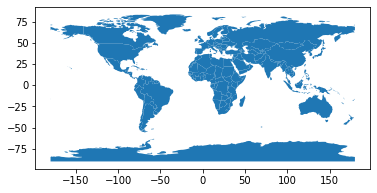

In [4]:
paises.plot();

/Users/germangonzalez/.pyenv/versions/3.7.5/envs/motus/lib/python3.7/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


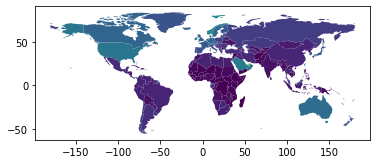

In [5]:
# Mapa coroplético por PIB pér cápita
# Limpiar los datos 
world = paises[(paises['pop_est'] > 0) & (paises['name'] != "Antarctica")]
# Crear la variable de PIB Per capita
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est
# Plot 
world.plot(column='gdp_per_cap');

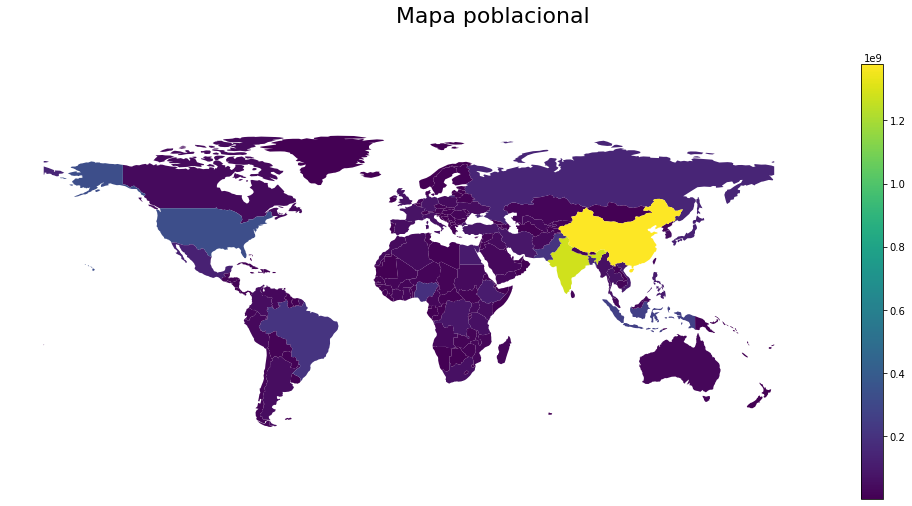

In [6]:
# Crear una figura blanca 
fig, ax = plt.subplots(1, 1, figsize = (18,8))
# Fijar la variable de poblacion 
world.plot(column='pop_est', ax=ax, legend=True)
# Agregar leyenda
plt.suptitle('Mapa poblacional', fontsize = 22)
# Desaparecer la cuadricula
ax.axis('off');

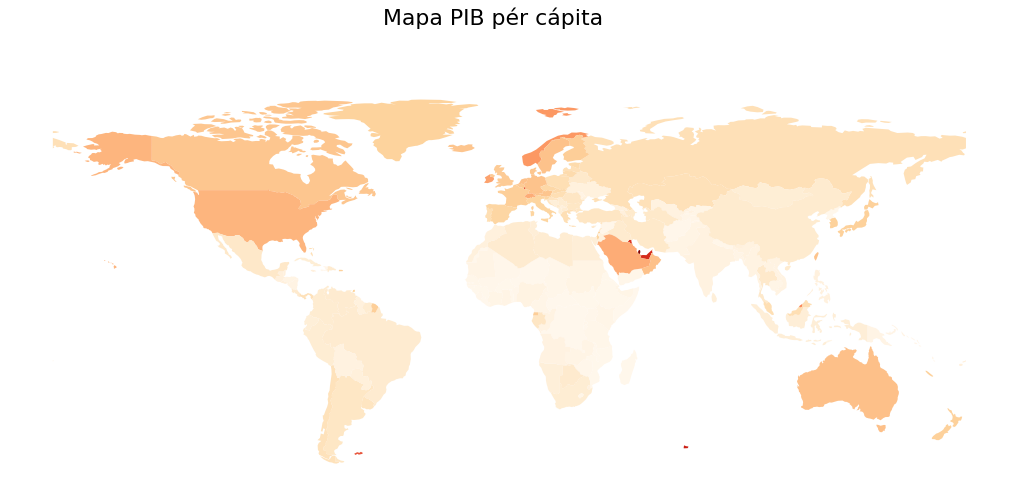

In [7]:
# Crear una figura blanca 
fig, ax = plt.subplots(1, 1, figsize = (18,8))
# Fijar la variable de GPD 
world.plot(column='gdp_per_cap', ax=ax, cmap = 'OrRd')
# Agregar leyenda
plt.suptitle('Mapa PIB pér cápita', fontsize = 22)
# Desaparecer la cuadricula
ax.axis('off');

(-1056983.1999999997, 22196999.199999996, 0.0, 173.25)

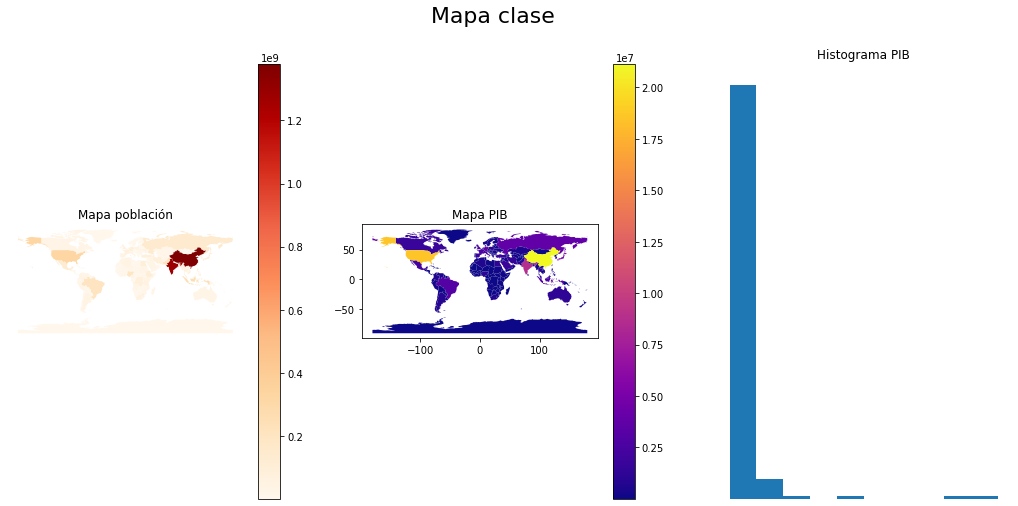

In [8]:
# Por ejemplo para hacer múltiples gráficos en una sola figura usamos el mismo plt.subplots(filas, columnas) indicando el número de filas y columnas de gráficos que queremos construir
fig, ax = plt.subplots(1,3,figsize = (18,8))
# En este caso ax es una lista de axes, y toca decirle en cual de todos estos es que queremos cada figura
paises.plot(column = 'pop_est', ax = ax[0], legend = True, cmap = 'OrRd') # Esto lo queremos en el primer axes ax[0]
ax[0].axis('off') # Para ese ax[0] queremos eliminar los ejes 
ax[0].set_title('Mapa población') # Y ponerle un título a este subgráfico

paises.plot(column = 'gdp_md_est', ax = ax[1], legend = True, cmap = 'plasma') # Ahora este mapa lo queremos en el segundo axes ax[1]
ax[1].set_title('Mapa PIB') # Le ponemos titulo al subgrafico
plt.suptitle('Mapa clase', fontsize = 22); # Agregamos un título a toda la figura

### ----- Histograma ------ ####
paises['gdp_md_est'].hist(ax = ax[2])
ax[2].set_title('Histograma PIB') # Le ponemos titulo al subgrafico
ax[2].axis('off') # Para ese ax[0] queremos eliminar los ejes 


In [9]:
ciudades = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

## Ciudades

In [10]:
ciudades

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)
...,...,...
197,Cairo,POINT (31.24802 30.05191)
198,Tokyo,POINT (139.74946 35.68696)
199,Paris,POINT (2.33139 48.86864)
200,Santiago,POINT (-70.66899 -33.44807)


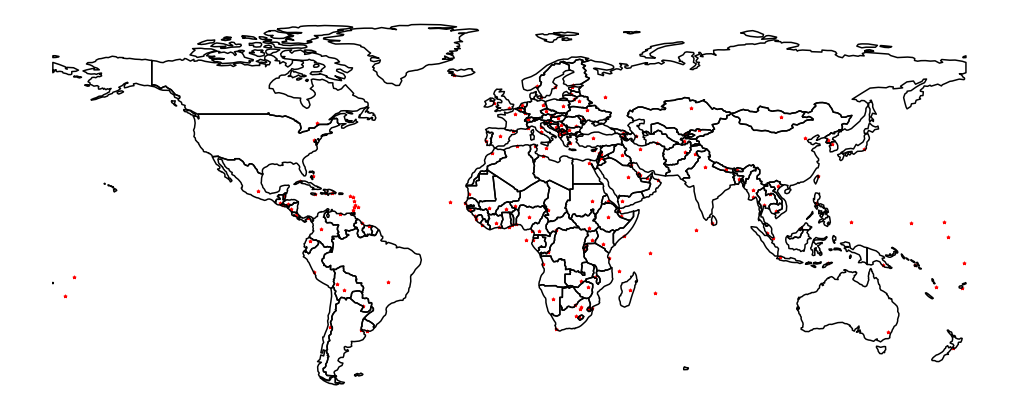

In [11]:
# Crear una figura blanca 
fig, ax = plt.subplots(1, 1, figsize = (18,8))
# Fijar un mapa del mundo
world.boundary.plot(edgecolor='black', ax=ax)
# Graficar las ciudades 
ciudades.plot(ax=ax, marker='*', color='red', markersize=10)
# Desaparecer la cuadricula
ax.axis('off')
# Almacenar png
plt.savefig('/Users/germangonzalez/Desktop/ciudades_mundo.png');

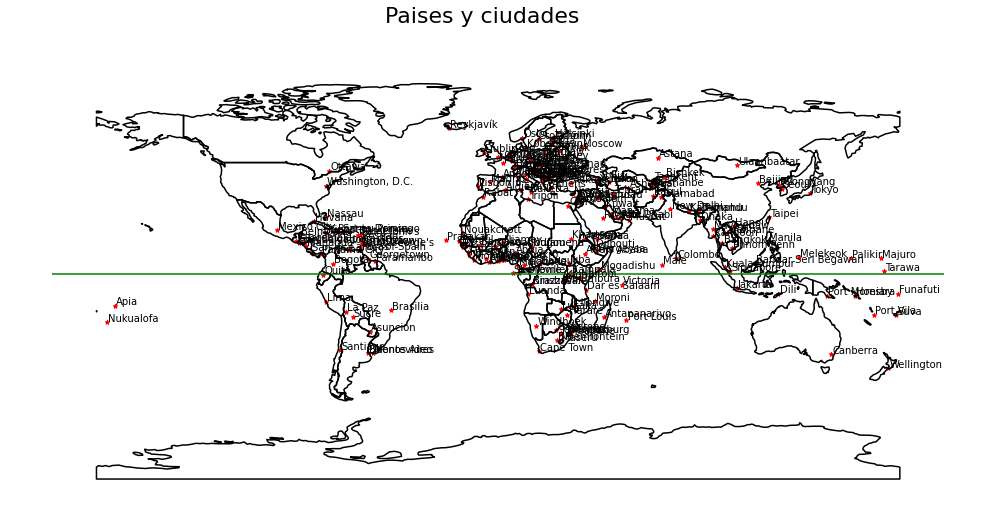

In [12]:
# Para agregar más capas nuevamente creamos los objetos figura y axes
fig, ax = plt.subplots(figsize = (18,8))
paises.boundary.plot(ax = ax, edgecolor = 'black') # Graficamos los bordes de los paises diciendole que lo pinte en ax = ax
ciudades.plot(ax = ax, marker = '*', color = 'red', markersize = 20) # Graficamos las ciudades nuevamente en ax = ax. Especificamos el color, el tamaño y el marcador.
ax.axis('off') # Eliminamos ejes.
# Luego agregamos los nombres de las ciudades con ax.text()
for i in range(len(ciudades)): # Para cada fila de la base de datos de ciudades
    # Escribimos el texto en la posición x de la longitud de la ciudad, la posición y de su laditud, y su nombre de la columna 'name'
    ax.text(ciudades.loc[i, 'geometry'].x + 0.5, ciudades.loc[i, 'geometry'].y + 0.5, ciudades.loc[i, 'name'])
plt.suptitle('Paises y ciudades', fontsize = 22) # Título del gráfico.
ax.hlines(0, -200, 200, color = 'green'); # Línea horizontal a la altura y = 0, y desde x_min = -200 hasta x_max = 200, en verde. Para lineas verticales ax.vlines
plt.savefig('ciudades_mundo.png'); # Guardamos la figura con plt.savefig(), se puede guardar en diferentes formatos y especificar calidad de la imágen y otros parámetros.

### Datos de eventos de minas antiperonal

In [13]:
minas = gpd.read_file('Datos/eventos_minas/')

## Graficar puntos

<AxesSubplot:>

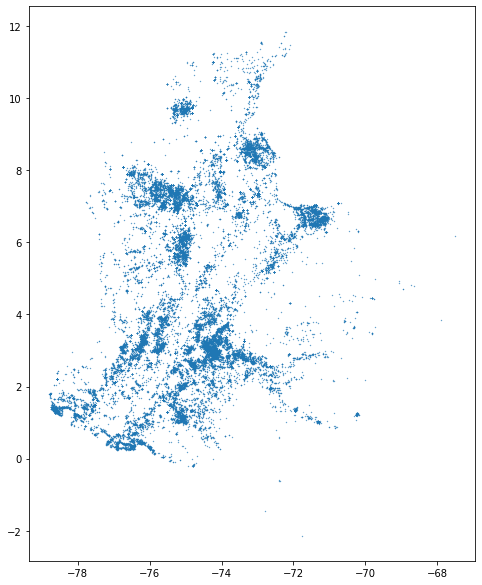

In [14]:
minas.plot(markersize = 0.1, figsize = (8,12))

In [15]:
### ----- Forma de extraer por x y y ------- ###
minas['Longitud'] = minas['geometry'].x
minas['Latitud'] = minas['geometry'].y
### ----- Forma 2: por cordenadas ---- ####
minas['Longitud'] = minas['geometry'].apply(lambda x: x.coords[0][0])
minas['Latitud'] = minas['geometry'].apply(lambda x: x.coords[0][1])

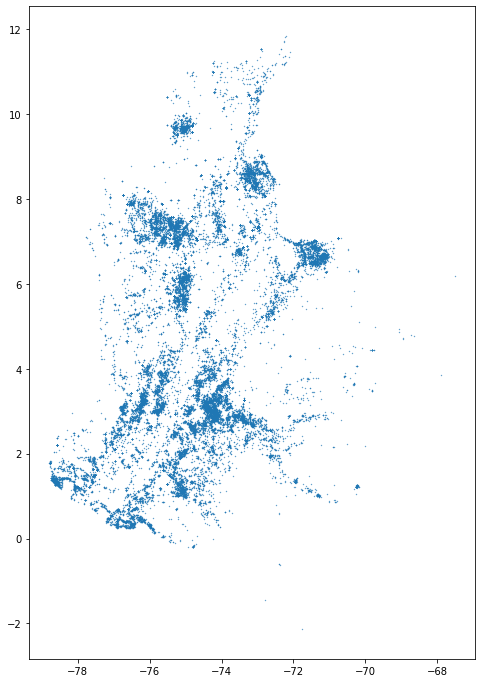

In [16]:
## Graficar Puntos latitud, longitud
fig, ax = plt.subplots(figsize = (8,12))
ax.scatter(minas['Longitud'], minas['Latitud'], s = 0.1);

In [17]:
#### -- Fijar indice de paises ----- #
paises = paises.set_index('name')

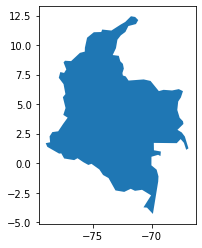

In [18]:
#### --- Filtrar colombia
paises.loc[['Colombia']].plot();

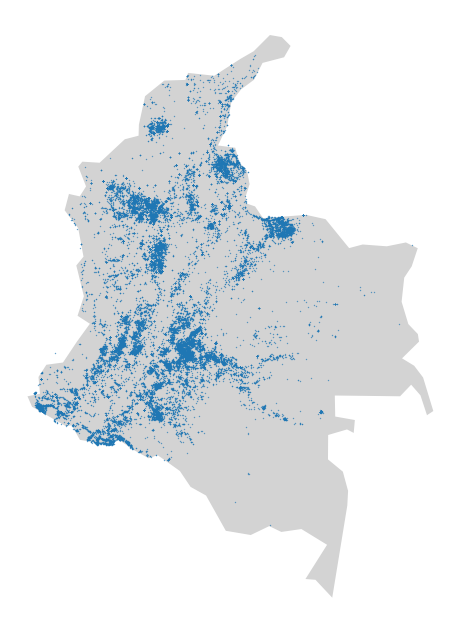

In [19]:
## --- Agregar el contorno de Colombia 
fig, ax = plt.subplots(figsize = (8,12))
paises.loc[['Colombia']].plot(ax = ax, color = 'lightgrey')
minas.plot(markersize = 0.1, ax = ax)
ax.axis('off');

In [22]:
## Simular heridos
minas['heridos'] = np.random.randint(1,100,len(minas))**(1/2)
minas['heridos'] = minas['heridos'].apply(lambda x: round(x))

In [24]:
mpios = gpd.read_file('Datos/MPM/MPM_FuenteCensal_2018.shp')
mpios.to_crs(epsg=4326, inplace=True)

<AxesSubplot:>

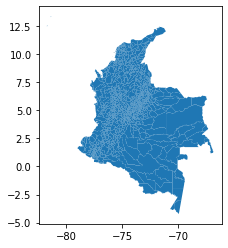

In [25]:
mpios.plot()

In [26]:
# Las ciudades del mundo también vienen pre-cargadas en geopandas
ciudades = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

In [30]:
Categorias= minas['tipo_area'].astype('category').cat.codes

In [31]:
set(minas['tipo_area'])

{'Rural', 'Urbana'}

In [32]:
set(Categorias)

{0, 1}

In [36]:
ciudades.query('name=="Bogota"')

,name,geometry
196,Bogota,POINT (-74.08529 4.59837)


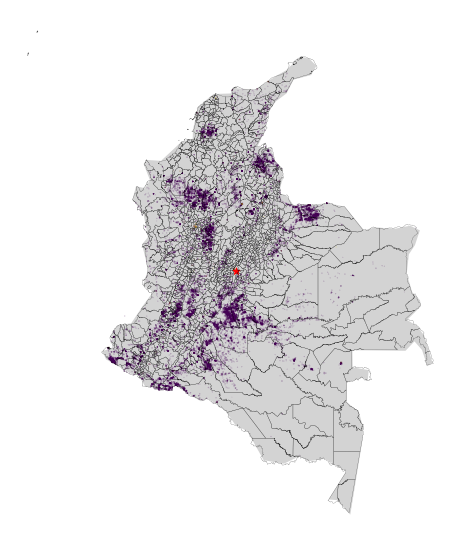

In [46]:
# Crear una figura blanca 
fig, ax = plt.subplots(figsize = (8,12))
# Fijar el mapa de colombia como base
paises.loc[['Colombia']].plot(ax = ax, color = 'lightgrey')
# Graficar lineas de los municipios
mpios.boundary.plot(ax = ax, edgecolor='k', linewidth=0.2, alpha = 0.8)
# Graficar categorias rural y urbano aumentando el tamaño dependiendo de los heridos simulados
ax.scatter(minas['Longitud'], minas['Latitud'], c = Categorias,s = minas['heridos']*0.001)
# Agregar bogota 
ciudades.query('name=="Bogota"').plot(ax=ax, marker='*', color='red', markersize=50)
ax.axis('off');


In [48]:
ciudades

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)
...,...,...
197,Cairo,POINT (31.24802 30.05191)
198,Tokyo,POINT (139.74946 35.68696)
199,Paris,POINT (2.33139 48.86864)
200,Santiago,POINT (-70.66899 -33.44807)


Markers: https://matplotlib.org/3.2.1/api/markers_api.html

### Vivienda nueva en Bogotá 

### Ejercicio: Graficar 

In [49]:
viviendas = pd.read_csv('Datos/vivienda_nueva_bta.csv')

In [51]:
viviendas

,Direccion,Barrio,Latitud,Longitud,Tipo_vivienda,Dproymes,Localidad,Cod_proyecto,Proyecto
0,Cr. 92 # 149-30,Campiña,-74.084032,4.744768,No VIS,Abril,Suba,20275,Colinas de Suba
1,Cr. 7 # 126-30,Pinar de Santa Bárbara,-74.028022,4.701646,No VIS,Abril,Usaquén,30712,Reserva de la Sierra
2,Tv. 19A # 96-56,Chicó,-74.053723,4.684059,No VIS,Abril,Chapinero,30959,Oqyana
3,Av. Suba con 119,Córdoba,-74.067317,4.706892,No VIS,Abril,Suba,31238,Provenza Imperial
4,Cl. 94 # 21-59,Chicó,-74.056800,4.681600,No VIS,Abril,Chapinero,31422,Art 94
...,...,...,...,...,...,...,...,...,...
628,Cr. 7 # 6-15 Sur,Calvo Sur,-74.084578,4.582397,No VIS,Abril,San Cristóbal,407123,Ed. Ludwyg
629,Cl. 36 Sur # 51D-53,El Tejar,-74.128551,4.601916,No VIS,Abril,Puente Aranda,407124,Ed. Alcala
630,Tv. 35 # 27B-21 Sur,Los Sauces,-74.115590,4.595823,No VIS,Abril,Puente Aranda,407125,Ed. Ebenezzer
631,Av. Cr. 70C # 57R-75 Sur,Perdomo,-74.162266,4.593081,VIS,Abril,Ciudad Bolívar,407128,Estancia 70


In [54]:
## Cambiar nombre de columnas 
viviendas.rename(columns={'Latitud': 'lon', 'Longitud':'lat'}, inplace = True)

In [55]:
viviendas[['lon', 'lat']].apply(Point, axis = 1)

0      POINT (-74.08403178899999 4.744767632999982)
1      POINT (-74.02802187499998 4.701645924999981)
2      POINT (-74.05372283700002 4.684059235999996)
3      POINT (-74.06731719300001 4.706891700000028)
4      POINT (-74.05680000000002 4.681600000999992)
                           ...                     
628    POINT (-74.08457805199998 4.582396764000008)
629    POINT (-74.12855075800002 4.601915764000012)
630     POINT (-74.11558958900001 4.59582268600002)
631    POINT (-74.16226561299999 4.593080907000001)
632    POINT (-74.06345299999998 4.845452000000023)
Length: 633, dtype: object

In [56]:
## Crear puntos en forma de figura geometrica 
viviendas['geom'] = viviendas[['lon', 'lat']].apply(Point, axis = 1)

In [58]:
## Definir la base de datos como geoDataFrame
viviendas = gpd.GeoDataFrame(viviendas.drop(columns = 'geom'), geometry = viviendas['geom'])
## Cambiar el formato a WGS84
viviendas.crs = {'init' :'epsg:4326'}

/Users/germangonzalez/.pyenv/versions/3.7.5/envs/motus/lib/python3.7/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [60]:
##### ----- Cargar localidades 
shp_bog = gpd.read_file("Datos/Localidades/Loca.shp", encoding = "utf-8")
shp_bog = shp_bog.set_index('LocNombre', drop=True)
shp_bog.crs = {'init' :'epsg:4326'}
shp_bog = shp_bog.drop('SUMAPAZ',axis=0) 

/Users/germangonzalez/.pyenv/versions/3.7.5/envs/motus/lib/python3.7/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


# Crear escala de colores

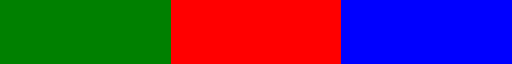

In [64]:
 colors.ListedColormap(['green', 'red','blue'])

In [67]:
set(viviendas['Tipo_vivienda'])

{'No VIS', 'VIP', 'VIS'}

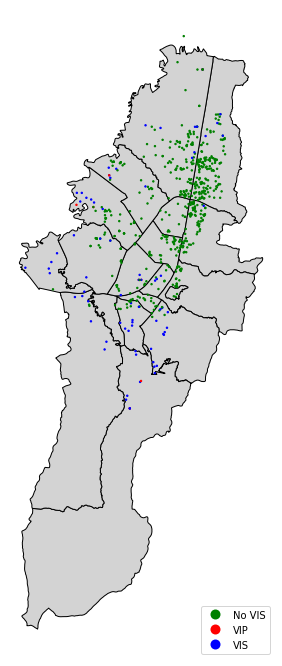

In [71]:
hcmap = colors.ListedColormap(['green', 'red','blue'])
# Crear una figura blanca 
fig, ax = plt.subplots(figsize = (8,12))
# Graficar figura de bogota
shp_bog.plot(color = 'lightgrey', edgecolor = 'k', ax = ax)
# Graficar por tipo de viviendas en la escala de colores
viviendas.plot(column = 'Tipo_vivienda', categorical = True, markersize = 2, cmap = hcmap, ax = ax, 
               legend = True, legend_kwds={'loc': 'lower right'})
ax.axis('off');